In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import ydf

In [188]:
df=pd.read_csv("../Dataset/rainfall_predict_train.csv")
df_test=pd.read_csv("../Dataset/rainfall_predict_test.csv")

In [189]:
df.head(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1


In [190]:
df_test.head(3)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9


In [191]:
df=df.drop(columns=["id","day"])
test=df_test.drop(columns=["id","day"])

<Axes: >

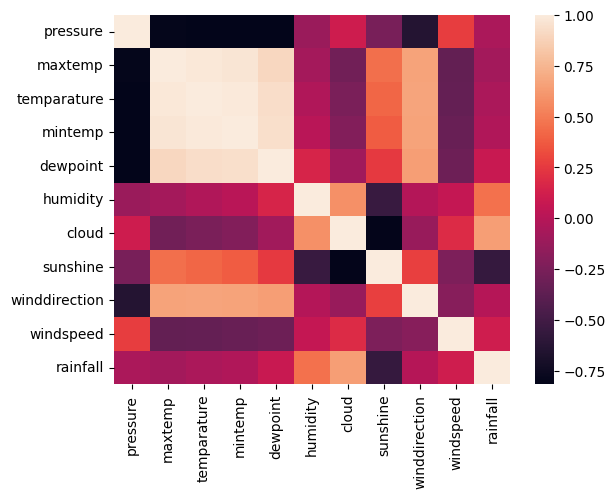

In [192]:
sns.heatmap(df.corr())

In [193]:
df.rainfall.value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

<Axes: xlabel='rainfall', ylabel='count'>

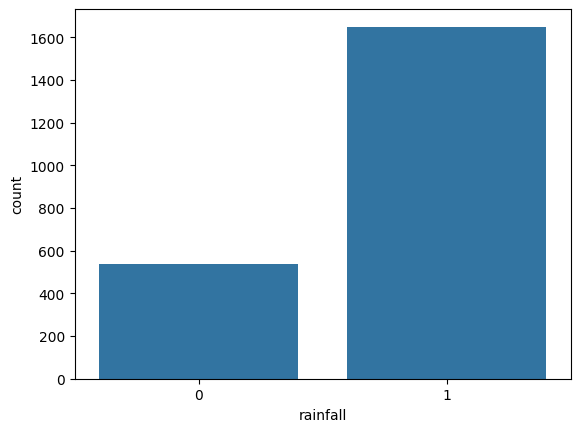

In [194]:
sns.barplot(df["rainfall"].value_counts())

In [195]:
x=df.select_dtypes(include=["float64","int64"])
x.columns.tolist()

['pressure',
 'maxtemp',
 'temparature',
 'mintemp',
 'dewpoint',
 'humidity',
 'cloud',
 'sunshine',
 'winddirection',
 'windspeed',
 'rainfall']

In [196]:
df.shape

(2190, 11)

In [197]:
# def remove_outliers(df):
#     # Calculate Q1, Q3, and IQR
#     columns=df.select_dtypes(include=["float64","int64"]).columns.tolist()
#     for i in columns:
#         Q1 = df[i].quantile(0.25)
#         Q3 = df[i].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the outlier range
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Filter out the outliers
#         df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
#     return df

In [198]:
# df=remove_outliers(df)

In [199]:
X=df.drop(columns=["rainfall"])
Y=df["rainfall"]

In [200]:
X.shape

(2190, 10)

In [201]:
X.head(3)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1


In [202]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
test=scaler.transform(test)

In [203]:
X.shape

(2190, 10)

In [204]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
2185    1
2186    1
2187    1
2188    1
2189    1
Name: rainfall, Length: 2190, dtype: int64

In [205]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_train,y_test=train_test_split(X,Y,test_size=.2)

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

tf_model=tf.keras.Sequential([
    Dense(32, activation='relu', input_shape=(X.shape[1],)),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(8, activation='relu'),   # Another hidden layer
    Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification
])


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:
tf_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386 (1.51 KB)

 Trainable params: 386 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

In [208]:
tf_model.compile(optimizer=tf.keras.optimizers.Adam(.01),loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

In [209]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy', factor=0.3, patience=10, min_lr=1e-6
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', patience=35, restore_best_weights=True
)

In [ ]:
history=tf_model.fit(X,Y,epochs=200,validation_split=0.25,callbacks=[early_stopping,lr_scheduler],verbose=1)

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.7347 - Precision: 0.8579 - Recall: 0.7255 - accuracy: 0.7218 - loss: 0.6609 - val_AUC: 0.8077 - val_Precision: 0.8981 - val_Recall: 0.9129 - val_accuracy: 0.8522 - val_loss: 0.5412 - learning_rate: 0.0100
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8256 - Precision: 0.8958 - Recall: 0.9386 - accuracy: 0.8700 - loss: 0.5048 - val_AUC: 0.7713 - val_Precision: 0.8712 - val_Recall: 0.9553 - val_accuracy: 0.8558 - val_loss: 0.4675 - learning_rate: 0.0100
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8320 - Precision: 0.8772 - Recall: 0.9365 - accuracy: 0.8564 - loss: 0.4494 - val_AUC: 0.8416 - val_Precision: 0.9085 - val_Recall: 0.9341 - val_accuracy: 0.8759 - val_loss: 0.4053 - learning_rate: 0.0100
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.8763 - Precision: 0.9122 - Recall: 0.9448 - accuracy: 0.8899 - loss: 0.3779 - val_AUC: 0.8394 - val_Precision: 0.9023 - val_Recall: 0.9341 - val_

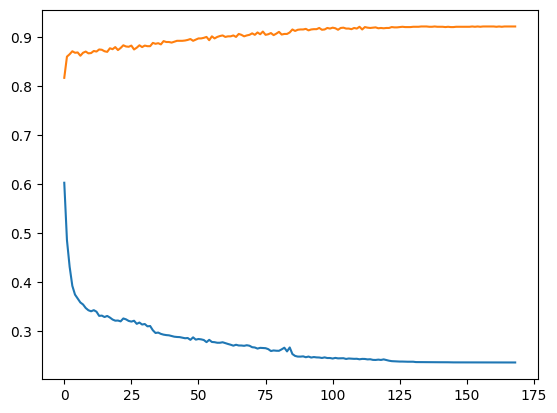

In [211]:

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

In [212]:
ydf_model=ydf.RandomForestLearner(
    label="rainfall",
    split_axis="SPARSE_OBLIQUE",
    sparse_oblique_normalization="MIN_MAX",
    sparse_oblique_num_projections_exponent=1.0,
    growing_strategy="BEST_FIRST_GLOBAL",
    num_candidate_attributes_ratio=0.9,
    task=ydf.Task.CLASSIFICATION
    ).train(df)

Train model on 2190 examples
Model trained in 0:00:00.490226


In [213]:
ydf_model.describe()

In [214]:
ydf_model.label_classes()

['0', '1']

In [215]:
predicted_y=tf_model.predict(test)

predicted_y=predicted_y>.5


predicted_y=predicted_y.astype(int)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [216]:
predicted_y=predicted_y.ravel()
ID=df_test["id"].ravel()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14600\3002817882.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  ID=df_test["id"].ravel()


In [217]:
submission = pd.DataFrame({
    "id": ID,
    "rainfall": predicted_y
})
submission.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [218]:
submission.shape

(730, 2)

In [219]:
submission.to_csv("rainfall_predict.csv",index=False)